In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import sodapy
from sodapy import Socrata

# Top 500 Monthly Searches

The below uses the requests package just so I can have a preview of what I'm looking for with the other method

In [3]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)

In [4]:
response

<Response [200]>

In [5]:
response.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

In [6]:
response.json

<bound method Response.json of <Response [200]>>

Truth be told, I'm not totally sure why this looks different from the other example, but that's okay!

In [92]:
#coming back later to say I figured out why -- I forgot the () after the .json

I was just informed that the "examples don't use the requests package" does not mean that I can't use the requests package so... back to requests! 

# QUESTION 1

### Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [70]:
q1 = requests.get(endpoint+'?year=2016&query_text=fire&$limit=50000')
q1

<Response [200]>

In [71]:
q1.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [72]:
q1j = q1.json()
q1j

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

Okay, so at a glance I can see that August had the most searches, but I want to see if I can get it ordered... I believe I could turn it into a pandas DataFrame, but I want to try to get it with the API request alone.

In [73]:
q1ordered = requests.get(endpoint+'?year=2016&query_text=fire&$order= query_count DESC')
q1jordered = q1ordered.json()
q1jordered

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'December',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_tex

### question 1 answer: August had the most searches for "fire" in 2016 with 47 searches.

# QUESTION 2

### Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [74]:
#unsuccessful attempt -- query_count was a successful parameter for the ordering clause in the last question, but not this apparently
q2 = requests.get(endpoint+'?query_count>100')
q2j = q2.json()
q2j

{'error': True, 'message': 'Unrecognized arguments [query_count>100]'}

In [75]:
q2 = requests.get(endpoint+'?$where= query_count > 100&$limit=50000')
q2j = q2.json()
q2j

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [76]:
q2jlength = len(q2j)
q2jlength

1262

<old answer when I hadn't included the limit = 50000 parameter was 1,000>
I am truthfully surprised that this is such an even number, but the other people in my breakout room got this answer too, so... I am inclined to trust it.

new note: it's not 1,000 anymore

### question 2 answer: there were 1,262 times in the dataset where a query was run more than 100 times in a month.

# QUESTION 3

### Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [79]:
q3 = requests.get(endpoint+'?query_text=codes&$where= query_count > 100&$limit=50000')
q3j = q3.json()
q3j

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [80]:
q3jlength = len(q3j)
q3jlength

56

### question 3 answer: there were 56 times in the dataset where "codes" was searched more than 100 times in a month.

# QUESTION 4 -- take 1

### Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [81]:
#all of this ended up being incorrect and useless (other than learning purposes), so rather than delete it all, I'm going to convert it all to markdown for future reference

q4 = requests.get(endpoint)
q4j = q4.json()
q4j

#I'm not sure if this is going to be helpful but I'm going to try to make a DataFrame

q4df = pd.DataFrame(q4j)
q4df

len(q4df)

len(q4j)

q4df.info()

maps_query = ['maps']
maps = q4df[q4df.query_text.isin(maps_query)]
maps

#that cannot possibly be right

maps2 = q4df[q4df.query_text.str.contains('maps')]
maps2

len(maps2)

In [26]:
#that feels better, but not...great...

OKAY. I just realized that there is a default limit of 1000 records, which in hindsight should have been obvious but WE ARE LEARNING, but I can override the limit with the $limit parameter. The data.nashville.gov page with the top 500 search results dataset says there are 43.7K rows in this dataset, so I'm going to try to just have limit=50k and see if it doesn't take 5 hours to load.

q4 = requests.get(endpoint+'?$limit=50000')
q4j = q4.json()
q4j

len(q4j)

#nice.

q4df = pd.DataFrame(q4j)
q4df

maps = q4df[q4df.query_text.isin(maps_query)]
maps

maps["month_year"] = maps['month_name'] + " " + maps['year']
maps

#going to dig into that warning message a bit more later, but for now, it looks like it did what I wanted, so I'm moving on

plt.figure(figsize=(15, 10))
plt.yticks()
plt.plot(maps['month_year'], maps['query_count'])
plt.show

#that's... weird. and the yticks are not in numerical order, and it's not a formatting issue...

q4df.describe()

#why isn't it giving me numeric details? wait I bet they're all stored as strings 

q4df.info()

#I was right oop... plus I don't have the month-year column I want so rewind a bit

q4df["month_year"] = q4df['month_name'] + " " + q4df['year']

q4df_dropped = q4df.dropna()

q4df_dropped.astype({'year':'int32', 'query_count':'int32'}).dtypes #ran error, need to drop NaN rows, added cell above

maps = q4df_dropped[q4df_dropped.query_text.isin(maps_query)]
maps

maps.describe()

#again?...
maps.info()

maps.astype({'year':'int32', 'query_count':'int32'}).dtypes

maps.info()

plt.figure(figsize=(15, 10))
plt.plot(maps['month_year'], maps['query_count'])
plt.show

# QUESTION 4 RESTART
##### now that I know a bunch more than I did, but it got messy, I'm starting this question over. I'll go back and fix the other questions with the limit=50k thing, too.

In [82]:
q4 = requests.get(endpoint+'?$limit=50000')
q4j = q4.json()
q4j

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [83]:
q4df = pd.DataFrame(q4j)
q4df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [84]:
q4df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   43677 non-null  object
 1   year         43677 non-null  object
 2   query_count  43676 non-null  object
 3   query_text   43677 non-null  object
 4   month        15177 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [85]:
q4df['month_year'] = q4df['month_name'] + " " + q4df['year']
q4df

,month_name,year,query_count,query_text,month,month_year
0,January,2014,223,ebid,NaN,January 2014
1,January,2014,112,property maps,NaN,January 2014
2,January,2014,97,maps,NaN,January 2014
3,January,2014,90,property tax,NaN,January 2014
4,January,2014,76,jobs,NaN,January 2014
...,...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7,July 2021
43673,July,2021,8,snap,7,July 2021
43674,July,2021,8,small business,7,July 2021
43675,July,2021,8,water department,7,July 2021


In [86]:
q4df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month_name   43677 non-null  object
 1   year         43677 non-null  object
 2   query_count  43676 non-null  object
 3   query_text   43677 non-null  object
 4   month        15177 non-null  object
 5   month_year   43677 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [87]:
q4df[['year','query_count']] = q4df[['year','query_count']].apply(pd.to_numeric)
print(q4df.dtypes)

month_name      object
year             int64
query_count    float64
query_text      object
month           object
month_year      object
dtype: object


In [88]:
maps_query = ['maps']
maps = q4df[q4df.query_text.isin(maps_query)]
maps

,month_name,year,query_count,query_text,month,month_year
2,January,2014,97.0,maps,NaN,January 2014
503,February,2014,140.0,maps,NaN,February 2014
1005,March,2014,144.0,maps,NaN,March 2014
1503,April,2014,152.0,maps,NaN,April 2014
2003,May,2014,119.0,maps,NaN,May 2014
...,...,...,...,...,...,...
39196,November,2020,86.0,maps,11,November 2020
39688,December,2020,113.0,maps,12,December 2020
41188,March,2021,132.0,maps,3,March 2021
41683,April,2021,148.0,maps,4,April 2021


In [89]:
maps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 2 to 42682
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month_name   82 non-null     object 
 1   year         82 non-null     int64  
 2   query_count  82 non-null     float64
 3   query_text   82 non-null     object 
 4   month        25 non-null     object 
 5   month_year   82 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.5+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

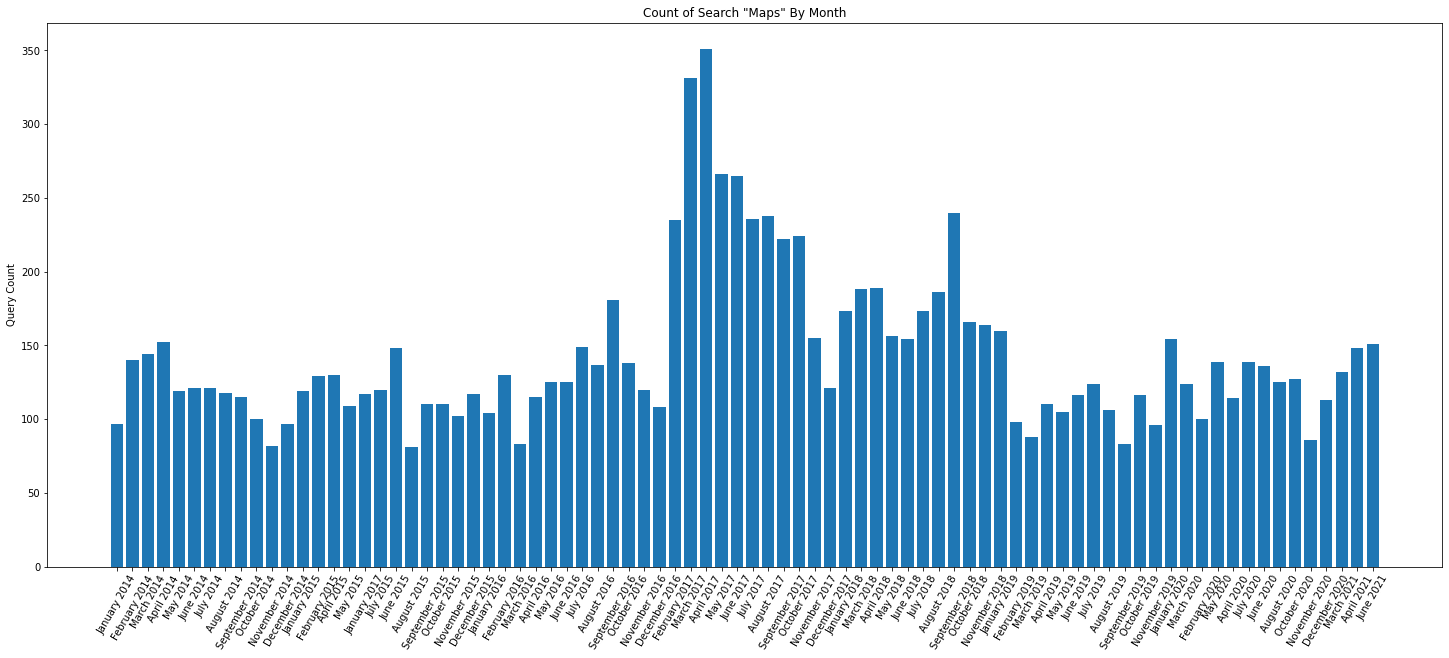

In [90]:
plt.figure(figsize=(25, 10))
plt.bar(maps['month_year'], maps['query_count'])
plt.title('Count of Search "Maps" By Month')
plt.ylabel('Query Count')
plt.xticks(rotation=60)
plt.show

In [91]:
#the point of this project is not to make gorgeous gorgeous graphs so I'm going to call this adequate for now :)

# STRETCH QUESTIONS

# QUESTION 5
### Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

In [93]:
#so I believe I have SoDaPy 2.1 installed, which should have no upper limit... let's give it a try.

In [94]:
endpoint2 = 'https://data.nashville.gov/resource/7qhx-rexh.json'
q5 = requests.get(endpoint2+'?$limit=950000')
q5j = q5.json()
q5j

[{'case_number': '890432',
  'status': 'Closed',
  'case_request': 'Trash, Recycling & Litter',
  'case_subrequest': 'Missed Pickup - Trash Cart Service',
  'additional_subrequest': 'Trash - Curbside/Alley Missed Pickup',
  'date_time_opened': '2022-02-08T22:26:54.000',
  'date_time_closed': '2022-02-09T21:36:17.000',
  'case_origin': 'hubNashville Community',
  'state_issue': 'False',
  'closed_when_created': 'False',
  'incident_address': '1609 Saunders Ave',
  'incident_city': 'MADISON',
  'incident_council_district': '8',
  'incident_zip_code': '37115',
  'latitude': '36.24031066163978',
  'longitude': '-86.73143289325408',
  'mapped_location': {'latitude': '36.24031066163978',
   'longitude': '-86.73143289325408'},
  ':@computed_region_wvby_4s8j': '1',
  ':@computed_region_3aw5_2wv7': '1',
  ':@computed_region_p6sk_2acq': '3',
  ':@computed_region_gxvr_9jxz': '12',
  ':@computed_region_yf9r_ed6g': '3',
  ':@computed_region_fvtq_wnma': '26',
  ':@computed_region_s8bq_67w7': '3',
  

In [97]:
#converting to a DataFrame just to make sure my understanding of how to read a JSON is correct, for learning purposes
q5df = pd.DataFrame(q5j)
q5df

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,:@computed_region_v67z_xm3t,:@computed_region_kh5x_g7w5,:@computed_region_cfa7_hbpz,:@computed_region_sjpq_96s8,:@computed_region_gisn_y5cm,:@computed_region_b9k3_hpc2,parent_case,oem_id,contact_type,preferred_language
0,890432,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-08T22:26:54.000,2022-02-09T21:36:17.000,hubNashville Community,False,False,...,2,3,744,1527,4,2,NaN,NaN,NaN,NaN
1,889750,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-02-08T15:24:31.000,2022-02-09T21:36:09.000,hubNashville Community,False,False,...,1,14,642,15798,8,1,NaN,NaN,NaN,NaN
2,889990,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-08T17:54:14.000,2022-02-09T21:32:43.000,Phone,False,False,...,7,7,14,15548,2,7,NaN,NaN,NaN,NaN
3,887729,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-04T23:29:13.000,2022-02-28T21:46:54.000,hubNashville Community,False,False,...,8,30,667,24062,7,8,NaN,NaN,NaN,NaN
4,890361,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Backdoor,2022-02-08T21:45:29.000,2022-02-28T21:49:05.000,Phone,False,False,...,4,20,122,15807,3,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936859,747,Closed,"Trash, Recycling & Litter",Residential Dumpster Services,Missed Dumpster Trash Service,2017-07-18T13:19:00.000,2017-07-26T08:47:00.000,Phone,FALSE,TRUE,...,7,7,NaN,15548,2,7,NaN,NaN,NaN,NaN
936860,817299,Closed,Customer Experience Surveys,Parks - 2021 Electric Bike Greenway Access Survey,Parks - 2021 Electric Bike Greenway Access Survey,2021-11-03T09:27:00.000,2021-11-03T09:27:00.000,hubNashville Community,FALSE,TRUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936861,3615,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,2017-07-31T14:50:00.000,2017-08-02T04:03:00.000,Phone,FALSE,TRUE,...,8,27,131,16166,7,8,NaN,NaN,Resident,NaN
936862,1763,Closed,"Streets, Roads & Sidewalks",Illegal Dumping,Roadway,2017-07-21T12:37:00.000,2017-07-28T16:22:00.000,Phone,FALSE,TRUE,...,2,10,425,1527,4,2,NaN,NaN,NaN,NaN


In [98]:
q5df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936864 entries, 0 to 936863
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  936864 non-null  object
 1   status                       936864 non-null  object
 2   case_request                 936444 non-null  object
 3   case_subrequest              932253 non-null  object
 4   additional_subrequest        904041 non-null  object
 5   date_time_opened             936864 non-null  object
 6   date_time_closed             919213 non-null  object
 7   case_origin                  936864 non-null  object
 8   state_issue                  936864 non-null  object
 9   closed_when_created          936864 non-null  object
 10  incident_address             637408 non-null  object
 11  incident_city                627370 non-null  object
 12  incident_council_district    626700 non-null  object
 13  incident_zip_c

### question 5 answer:

I already knew this dataset was significantly larger than the top 500 monthly searches set, but that is true in both dimensions of the output; there are over 930,000 rows, and 34 columns, while the other only had 5 columns. This one has more data types, as well; there are the appearance of boolean fields (although the entire DF is actually strings, but let's pretend for a bit). This dataset also has a native indexing system of sorts, since each row has a unique identifier assigned. This is geographical data, and appears to be compatible with geospatial mapping.

# QUESTION 6
### Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.

In [106]:
#building permits issued
permits = 'https://data.nashville.gov/resource/3h5w-q8b7.json'
#tornado siren locations
sirens = 'https://data.nashville.gov/resource/736j-2drk.json'

In [107]:
q6permits = requests.get(permits+'?$limit=50000')
q6permitsj = q6permits.json()
q6permitsj

[{'permit': '2022025230',
  'permit_type_description': 'Building Commercial - Tenant Finish Out',
  'permit_subtype_description': 'General Office, Professional Services',
  'parcel': '092124A20000CO',
  'date_entered': '2022-04-15T00:00:00.000',
  'date_issued': '2022-05-12T00:00:00.000',
  'const_cost': '199656',
  'address': '1616  WEST END AVE  3303',
  'city': 'NASHVILLE',
  'state': 'TN',
  'zip': '37203',
  'subdivision_lot': 'UNIT 3303 THE RESIDENCES AT BROADWEST AMENDED',
  'contact': 'kevin leong',
  'per_ty': 'CACT',
  'permit_subtype': 'CAD02B016',
  'ivr_trk': '4142667',
  'purpose': 'Interior remodeling - Finishing out existing white box, Unit 3303 at the Broadwest Condo\nMaster Permit #2018078985 (Broadwest\npoc kevin leong',
  'council_dist': '21',
  'census_tract': '37019500',
  'mapped_location': {'latitude': '36.153996',
   'longitude': '-86.793849',
   'human_address': '{"address": "1616 WEST END AVE 3303", "city": "NASHVILLE", "state": "TN", "zip": "37203"}'},
  ':@

In [108]:
q6sirens = requests.get(sirens+'?$limit=50000')
q6sirensj = q6sirens.json()
q6sirensj

[{'site_name': 'Ezell Road Park',
  'address': '5135 Harding Place',
  'city': 'Nashville',
  'zip': '37211',
  'siren_power': 'Eclipse 8',
  'location': {'latitude': '36.090944', 'longitude': '-86.686028'},
  ':@computed_region_gisn_y5cm': '7',
  ':@computed_region_sjpq_96s8': '15803',
  ':@computed_region_v3ji_vzam': '2005',
  ':@computed_region_c9xn_skx3': '18',
  ':@computed_region_f73m_vb2k': '9'},
 {'site_name': 'Sevier Park',
  'address': '3000 Granny White Pike',
  'city': 'Nashville',
  'zip': '37204',
  'siren_power': 'Eclipse 8',
  'location': {'latitude': '36.118861', 'longitude': '-86.787889'},
  ':@computed_region_gisn_y5cm': '5',
  ':@computed_region_sjpq_96s8': '30813',
  ':@computed_region_v3ji_vzam': '2005',
  ':@computed_region_c9xn_skx3': '11',
  ':@computed_region_cfa7_hbpz': '1138',
  ':@computed_region_f73m_vb2k': '6'},
 {'site_name': 'Fannie May Dees Park',
  'address': '2401 Blakemore Ave',
  'city': 'Nashville',
  'zip': '37212',
  'siren_power': 'Eclipse 8',


In [109]:
permitsdf = pd.DataFrame(q6permitsj)
permitsdf

,permit,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,const_cost,address,city,state,...,:@computed_region_v3ji_vzam,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,:@computed_region_kh5x_g7w5,:@computed_region_yf9r_ed6g,:@computed_region_fvtq_wnma,:@computed_region_p6sk_2acq,:@computed_region_b9k3_hpc2,:@computed_region_gxvr_9jxz,:@computed_region_cfa7_hbpz
0,2022025230,Building Commercial - Tenant Finish Out,"General Office, Professional Services",092124A20000CO,2022-04-15T00:00:00.000,2022-05-12T00:00:00.000,199656,1616 WEST END AVE 3303,NASHVILLE,TN,...,2005,13,30406,13,13,25,20,7,40,NaN
1,2022012724,Building Commercial - Tenant Finish Out,"General Office, Professional Services",08111002800,2022-02-25T00:00:00.000,2022-05-12T00:00:00.000,65000,2109 BUCHANAN ST 106,NASHVILLE,TN,...,2005,15,NaN,15,15,24,25,1,51,NaN
2,2022028458,Building Sign Permit,Sign - Ground / Wall Signs,06103014200,2022-04-28T00:00:00.000,2022-05-12T00:00:00.000,3500,4709 GALLATIN PIKE,NASHVILLE,TN,...,2005,8,16164,8,8,10,15,2,23,1026
3,2022012698,Building Commercial - Tenant Finish Out,"General Office, Professional Services",08111002800,2022-02-25T00:00:00.000,2022-05-12T00:00:00.000,65000,2109 BUCHANAN ST 101,NASHVILLE,TN,...,2005,15,NaN,15,15,24,25,1,51,NaN
4,2022027667,Building Demolition Permit,Demolition Permit - Residential,07005004500,2022-04-26T00:00:00.000,2022-05-12T00:00:00.000,6000,3220 ALPINE PARK BLVD,NASHVILLE,TN,...,2005,2,16168,2,2,23,2,1,34,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34487,2019025846,Building Residential - New,"Accessory Structure, Garage",06104006000,2019-05-03T00:00:00.000,2019-05-09T00:00:00.000,37748,4902B RUSKIN AVE,NASHVILLE,TN,...,2005,8,16164,8,8,10,15,2,23,82
34488,2019026691,Building Residential - New,Single Family Residence,072104K00200CO,2019-05-08T00:00:00.000,2019-05-09T00:00:00.000,167849,1631B CHASE ST,NASHVILLE,TN,...,2005,8,16164,8,8,10,15,7,23,58
34489,2019027005,Building Residential - Addition,Single Family Residence,04203006800,2019-05-09T00:00:00.000,2019-05-09T00:00:00.000,30000,634 E CAMPBELL RD,MADISON,TN,...,2005,3,1527,3,3,26,3,2,12,NaN
34490,2019027113,Building Use & Occupancy,"Accessory Structure, Pools - Residential",03314005400,2019-05-09T00:00:00.000,2019-05-09T00:00:00.000,5000,209 CUNNIFF PKWY,GOODLETTSVILLE,TN,...,2005,9,13132,9,9,41,16,2,41,820


In [110]:
sirensdf = pd.DataFrame(q6sirensj)
sirensdf

,site_name,address,city,zip,siren_power,location,:@computed_region_gisn_y5cm,:@computed_region_sjpq_96s8,:@computed_region_v3ji_vzam,:@computed_region_c9xn_skx3,:@computed_region_f73m_vb2k,:@computed_region_cfa7_hbpz
0,Ezell Road Park,5135 Harding Place,Nashville,37211,Eclipse 8,"{'latitude': '36.090944', 'longitude': '-86.68...",7,15803,2005,18,9,NaN
1,Sevier Park,3000 Granny White Pike,Nashville,37204,Eclipse 8,"{'latitude': '36.118861', 'longitude': '-86.78...",5,30813,2005,11,6,1138
2,Fannie May Dees Park,2401 Blakemore Ave,Nashville,37212,Eclipse 8,"{'latitude': '36.136167', 'longitude': '-86.80...",5,15804,2005,12,6,578
3,Paragon Mills Park,Antioch Pike,Nashville,37211,Eclipse 8,"{'latitude': '36.235417', 'longitude': '-86.77...",4,15550,2005,9,1,NaN
4,Jere Baxter Alternative,3515 Gallatin Pike,Nashville,37216,Eclipse 8,"{'latitude': '36.212694', 'longitude': '-86.73...",2,16164,2005,3,2,1026
...,...,...,...,...,...,...,...,...,...,...,...,...
88,Coley Davis @ Harpeth Springs Dr.,8146 Coley Davis Rd,Nashville,37221,508,"{'latitude': '36.073493', 'longitude': '-86.98...",8,16173,2005,31,5,153
89,Percy Warner Park Entrance/Golf Course,1215 Belle Meade Blvd.,Nashville,37205,508,"{'latitude': '36.081828', 'longitude': '-86.86...",8,30816,2005,32,6,NaN
90,Metro Water Smith Springs Resivoir,2749 Smith Springs Rd,Antioch,37217,508,"{'latitude': '36.022105', 'longitude': '-86.62...",7,24062,2005,33,8,NaN
91,Old Center Elementary,1245 Dickerson Pike,Nashville,37072,Eclipse 8,"{'latitude': '36.079686', 'longitude': '-86.74...",5,15803,2005,24,9,691


In [114]:
permits_zip = permitsdf.zip.value_counts()
permits_zip = pd.DataFrame(permits_zip)
permits_zip.reset_index(inplace=True)
permits_zip.columns = ['Zip', 'Permit_Count']
permits_zip

,Zip,Permit_Count
0,37209,3544
1,37013,3502
2,37207,2445
3,37206,2387
4,37203,2301
5,37208,1894
6,37211,1893
7,37076,1388
8,37205,1374
9,37215,1328


In [115]:
sirens_zip = sirensdf.zip.value_counts()
sirens_zip = pd.DataFrame(sirens_zip)
sirens_zip.reset_index(inplace=True)
sirens_zip.columns = ['Zip', 'Siren_Count']
sirens_zip

,Zip,Siren_Count
0,37013,9
1,37211,8
2,37207,8
3,37205,5
4,37214,5
5,37217,4
6,37203,4
7,37115,4
8,37209,4
9,37221,4


In [116]:
combined = pd.merge(permits_zip, sirens_zip, on=['Zip'], how='outer')
combined

,Zip,Permit_Count,Siren_Count
0,37209,3544.0,4.0
1,37013,3502.0,9.0
2,37207,2445.0,8.0
3,37206,2387.0,3.0
4,37203,2301.0,4.0
5,37208,1894.0,2.0
6,37211,1893.0,8.0
7,37076,1388.0,3.0
8,37205,1374.0,5.0
9,37215,1328.0,2.0


In [117]:
combined = combined.fillna(0)
combined

,Zip,Permit_Count,Siren_Count
0,37209,3544.0,4.0
1,37013,3502.0,9.0
2,37207,2445.0,8.0
3,37206,2387.0,3.0
4,37203,2301.0,4.0
5,37208,1894.0,2.0
6,37211,1893.0,8.0
7,37076,1388.0,3.0
8,37205,1374.0,5.0
9,37215,1328.0,2.0


##### I want to filter this to zipcodes with 0 tornado sirens, and could in theory move into the geospatial ecosystem and make a map, but would probably just make some sort of chart. Either way, I ran out of class time. I'll be back!